In [1]:
"""
conv.ipynb
En este archivo generamos un plot mostrando la convolución de una función seno con un kernel gaussiano para diferentes valores del parámetro épsilon
"""

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.cm as cm
from scipy.signal import convolve
import scienceplots
import os
plt.style.use(["science", "grid"])

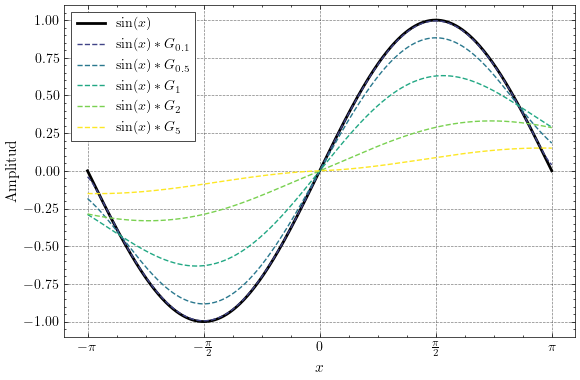

In [2]:
# Límite del plot y espacio lineal para samplear las funciones
L, SAMPLES = np.pi, 5000
DX = 2 * L / SAMPLES
x = np.linspace(-L, L, SAMPLES)

# Kernel Gaussiano
def gaussian_kernel(x, eps=1, sigma=1):
    return np.exp(-x**2 / (2 * sigma**2 * eps**2)) / (np.sqrt(2 * np.pi) * sigma * eps)

# Seno
def sin(x):
    return np.sin(x)

# Valores epsilon y colores
eps_values = [0.1, 0.5, 1, 2, 5]
colors = cm.viridis(np.linspace(0.2, 1, len(eps_values))) 
plt.figure(figsize=(6, 4))
plt.plot(x, sin(x), label=r'$\sin(x)$', linewidth=2, color='black')

# Plots principales
for eps, color in zip(eps_values, colors):
    conv_result = convolve(sin(x), gaussian_kernel(x, eps), mode='same') * DX
    plt.plot(x, conv_result, label=rf'$\sin(x) \ast G_{{{eps}}}$', linestyle='dashed', color=color)

xticks = [-np.pi, -np.pi/2, 0, np.pi/2, np.pi]
xticklabels = [r'$-\pi$', r'$-\frac{\pi}{2}$', r'$0$', r'$\frac{\pi}{2}$', r'$\pi$']
yticks = [-1, 0, 1]
plt.xticks(xticks, xticklabels)

legend = plt.legend(fancybox=False, edgecolor="black")
legend.get_frame().set_linewidth(0.5)

plt.xlabel(r'$x$', fontsize=11)
plt.ylabel(r'Amplitud', fontsize=11)

plt.tight_layout()
plt.savefig(os.path.join("plots", "gauss_conv.pdf"), dpi=300)
plt.show()